In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import time

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3

In [3]:
# Use the 'tf.keras.preprocessing.image_dataset_from_directory' function to create a dataset from image files in a directory.

dataset = tf.keras.preprocessing.image_dataset_from_directory('tomato', 
                                                             shuffle=True,
                                                             image_size = (IMAGE_SIZE, IMAGE_SIZE),
                                                             batch_size = BATCH_SIZE
                                                             )

Found 16011 files belonging to 10 classes.


In [4]:
class_names = dataset.class_names
class_names

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [8]:
len(class_names)

10

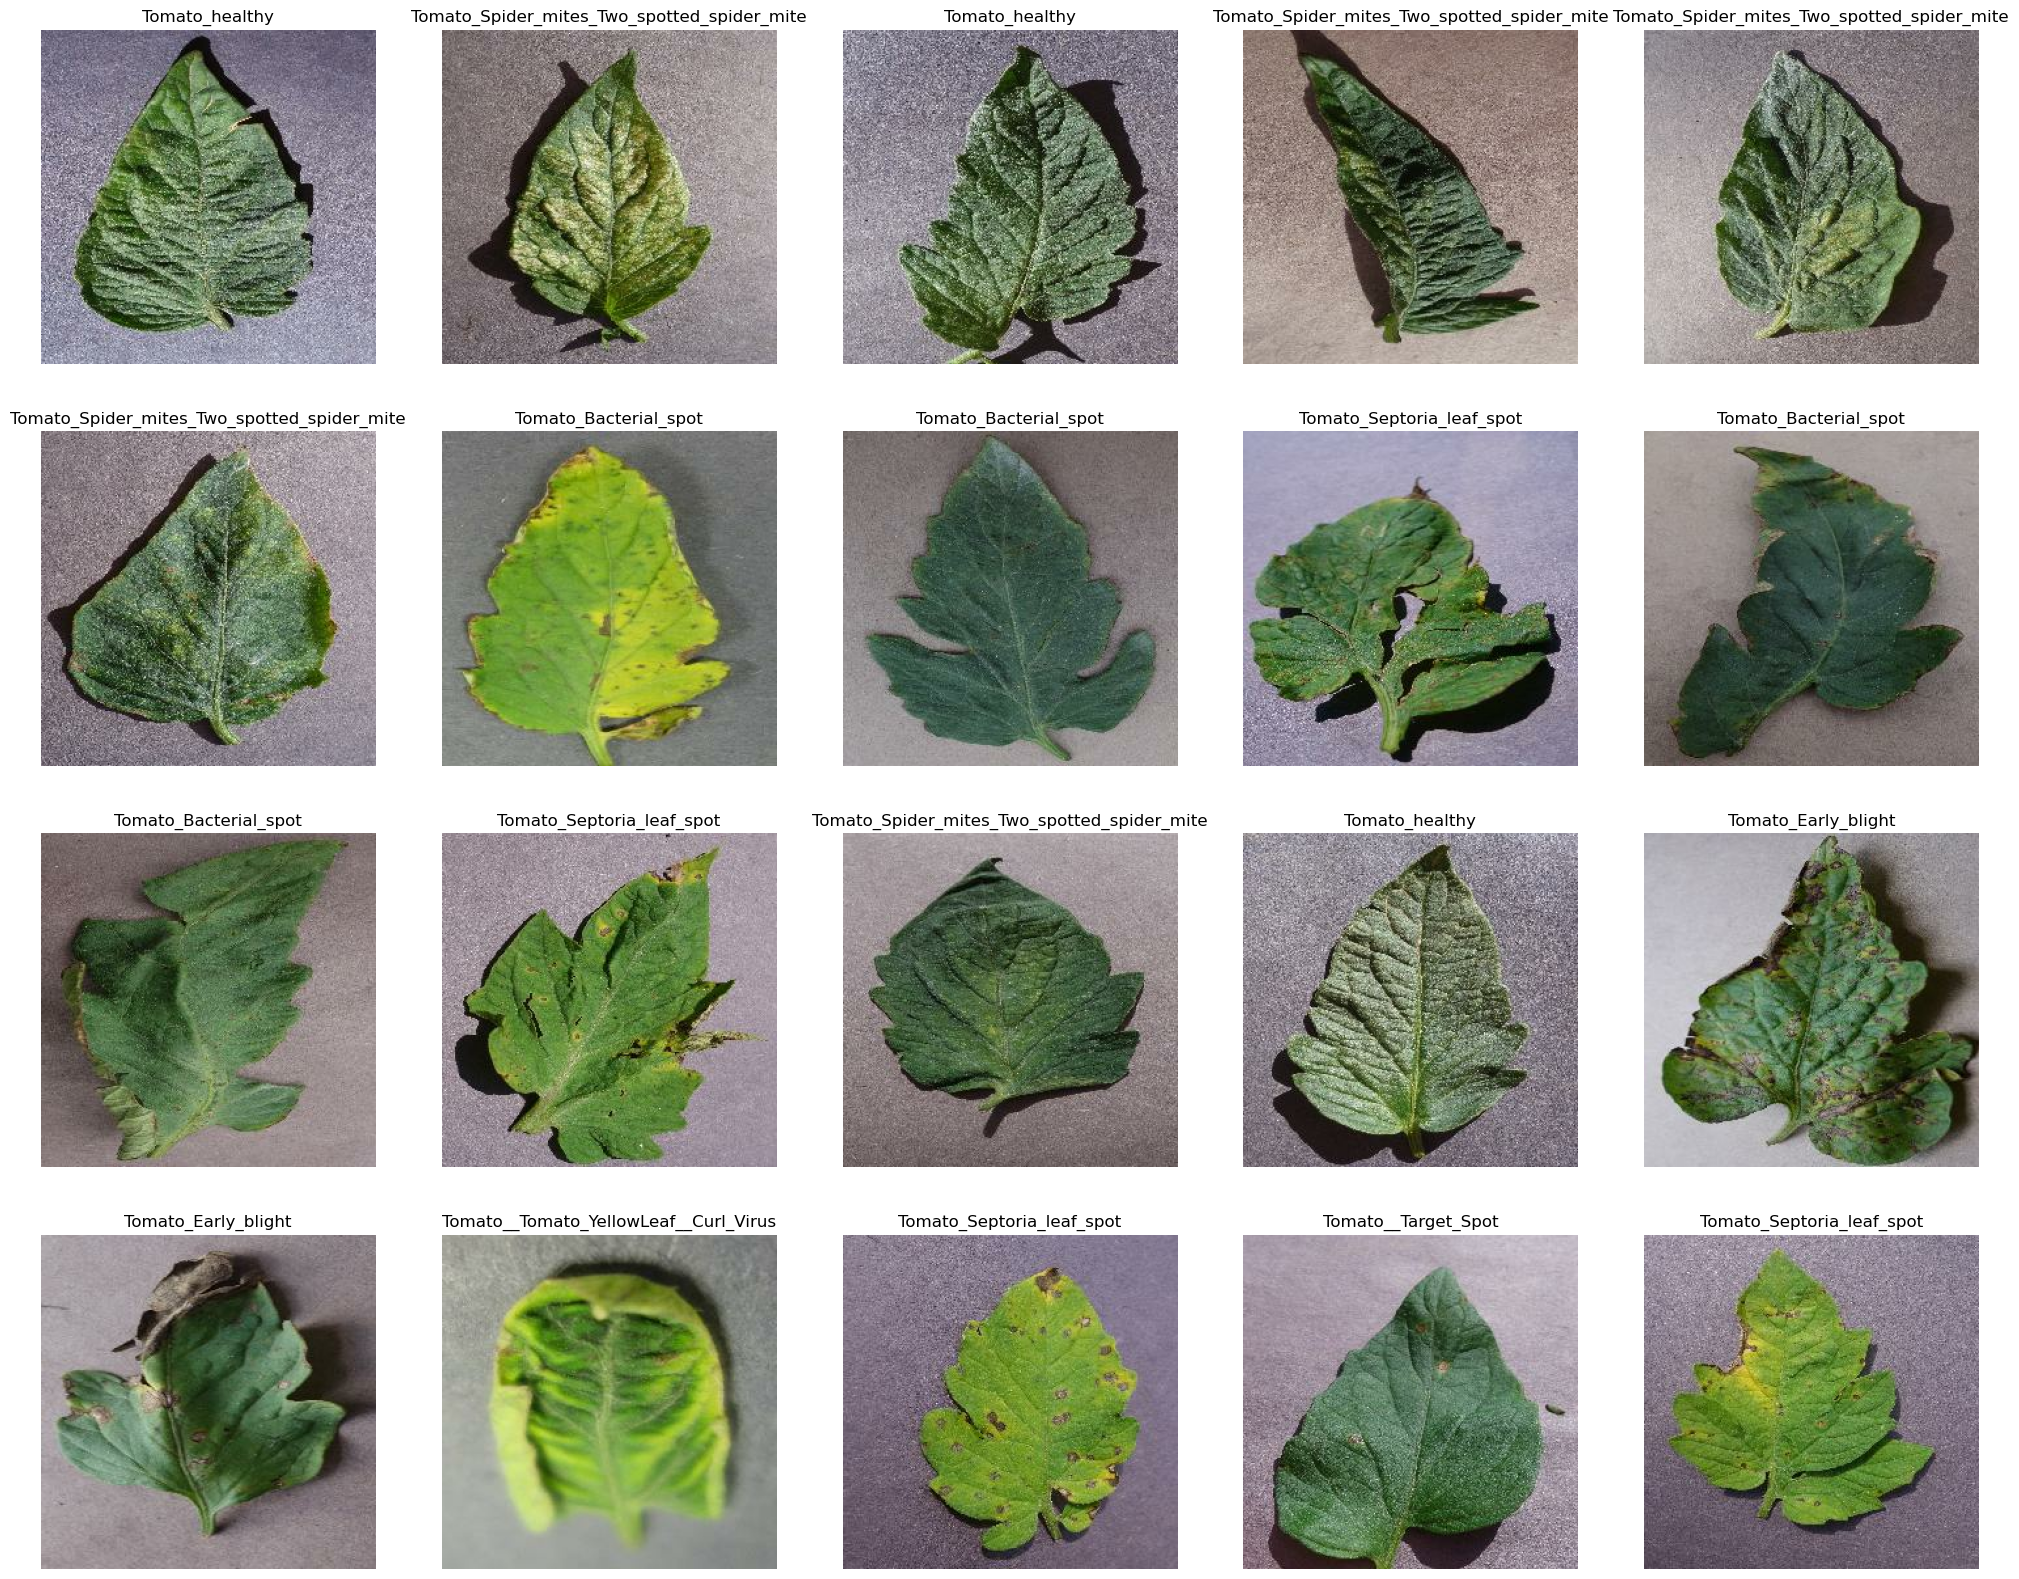

In [14]:
plt.figure(figsize=(25,20))
for image_batch, label_batch in dataset.take(1):
    for i in range(20):
        ax = plt.subplot(4,5, i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')
    #print(image_batch[0])

In [ ]:
# This function partitions a given dataset into training, validation, and test subsets.

def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    # Determine the total size of the dataset
    ds_size = len(ds)
    
    # Shuffle the dataset if the 'shuffle' parameter is set to True
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    # Calculate the sizes of the training, validation, and test subsets based on the specified splits
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    # Create the training dataset by taking the first 'train_size' elements from the shuffled dataset
    train_ds = ds.take(train_size)
    
    # Create the validation dataset by skipping the training data and taking the next 'val_size' elements
    val_ds = ds.skip(train_size).take(val_size)
    
    # Create the test dataset by skipping both training and validation data
    test_ds = ds.skip(train_size).skip(val_size)
    
    # Return the training, validation, and test datasets
    return train_ds, val_ds, test_ds

In [6]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [7]:
len(train_ds)

400

In [8]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [9]:
resize_and_rescale = tf.keras.Sequential([layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
                    layers.experimental.preprocessing.Rescaling(1.0/255)])

In [10]:
data_augmentation = tf.keras.Sequential([layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
                                        layers.experimental.preprocessing.RandomRotation(0.2),])

In [11]:
# Define the input shape for the model, including batch size, image size, and number of channels
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

# Calculate the number of output classes based on the length of class_names
n_classes = len(class_names)

# Set the number of training epochs for the model
EPOCHS = 20

# Create a Sequential model for building the neural network architecture
model = models.Sequential([
                            # Data preprocessing layers
                        resize_and_rescale,
                          data_augmentation,
                          layers.Conv2D(32, (3,3), activation='relu', input_shape = input_shape),
                          layers.MaxPooling2D((2, 2)),
                          layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
                          layers.MaxPooling2D((2, 2)),
                          layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
                          layers.MaxPooling2D((2, 2)),
                          layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
                          layers.MaxPooling2D((2, 2)),
                          layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
                          layers.MaxPooling2D((2, 2)),
                          layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
                          layers.MaxPooling2D((2, 2)),
                          layers.Flatten(),
                          layers.Dense(64, activation='relu'),
                          layers.Dense(n_classes, activation= 'softmax')
                          ])
model.build(input_shape = input_shape)

In [ ]:
# Define the input shape for the model, including batch size, image size, and number of channels
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

# Calculate the number of output classes based on the length of class_names
n_classes = len(class_names)

# Set the number of training epochs for the model
EPOCHS = 20

# Create a Sequential model for building the neural network architecture
model = models.Sequential([
    # Data preprocessing layers
    resize_and_rescale,
    data_augmentation,
    
    # Convolutional layers with max-pooling
    layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Flatten the output from convolutional layers
    layers.Flatten(),
    
    # Dense (fully connected) layers
    layers.Dense(64, activation='relu'),
    
    # Output layer with softmax activation for class prediction
    layers.Dense(n_classes, activation='softmax')
])

# Build the model with the specified input shape
model.build(input_shape=input_shape)

In [12]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [14]:
model.compile(
optimizer= 'adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
metrics=['accuracy'])

In [15]:
# Start the timer
start_time = time.time()

#Train the Model with training dataset
history = model.fit(train_ds,
    epochs=EPOCHS,
    verbose=1,
    validation_data=val_ds)
# Calculate the execution time
execution_time = time.time() - start_time
print(f"Model trainig time: {execution_time} seconds")

Epoch 1/20
400/400 [==============================] - 31298s 76s/step - loss: 1.5679 - accuracy: 0.4359 - val_loss: 1.1814 - val_accuracy: 0.6019
Epoch 2/20
400/400 [==============================] - 1760s 4s/step - loss: 0.9110 - accuracy: 0.6830 - val_loss: 1.2127 - val_accuracy: 0.5825
Epoch 3/20
400/400 [==============================] - 2436s 6s/step - loss: 0.6762 - accuracy: 0.7704 - val_loss: 0.8199 - val_accuracy: 0.7344
Epoch 4/20
400/400 [==============================] - 3428s 9s/step - loss: 0.5526 - accuracy: 0.8046 - val_loss: 1.2664 - val_accuracy: 0.6694
Epoch 5/20
400/400 [==============================] - 3865s 10s/step - loss: 0.4349 - accuracy: 0.8474 - val_loss: 1.3347 - val_accuracy: 0.7169
Epoch 6/20
400/400 [==============================] - 10702s 27s/step - loss: 0.3939 - accuracy: 0.8645 - val_loss: 0.4116 - val_accuracy: 0.8569
Epoch 7/20
400/400 [==============================] - 4572s 11s/step - loss: 0.3285 - accuracy: 0.8848 - val_loss: 0.3111 - val_acc

In [16]:
scores = model.evaluate(test_ds)

51/51 [==============================] - 2066s 1s/step - loss: 0.3795 - accuracy: 0.8854


In [17]:
scores

[0.37948113679885864, 0.8854166865348816]

In [18]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 400}

In [19]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

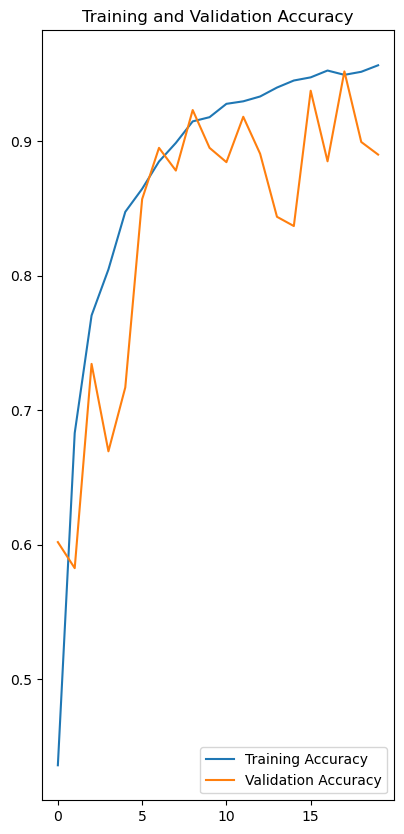

In [21]:
#Make a plot of the Training accuracy againt validation acurracy
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

Text(0.5, 1.0, 'Training and Validation Loss')

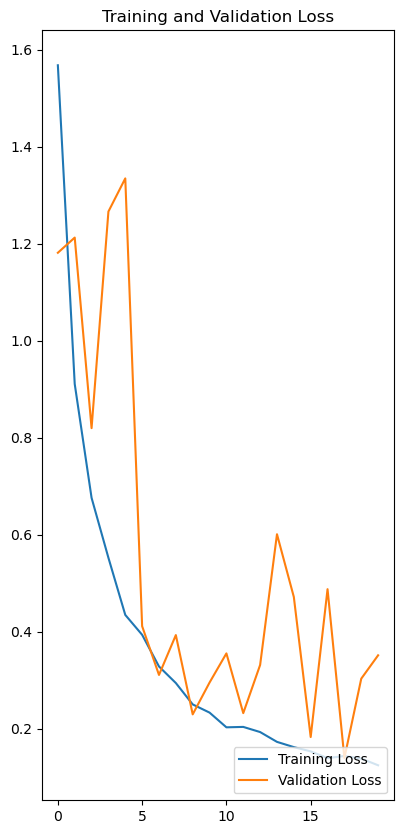

In [22]:
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')

first image to predict
actual label: Tomato_Early_blight
1/1 [==============================] - 1s 887ms/step
predicted label: Tomato_Early_blight


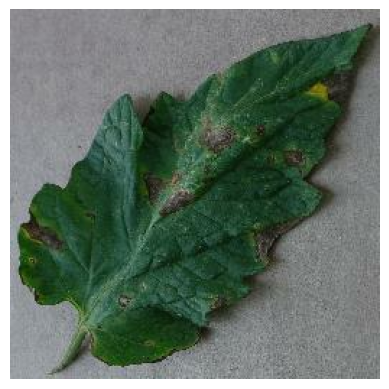

In [33]:
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print('first image to predict')
    plt.imshow(first_image)
    plt.axis('off')
    print("actual label:", class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:", class_names[np.argmax(batch_prediction[0])])
    

In [24]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) #Create a batch
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 83ms/step


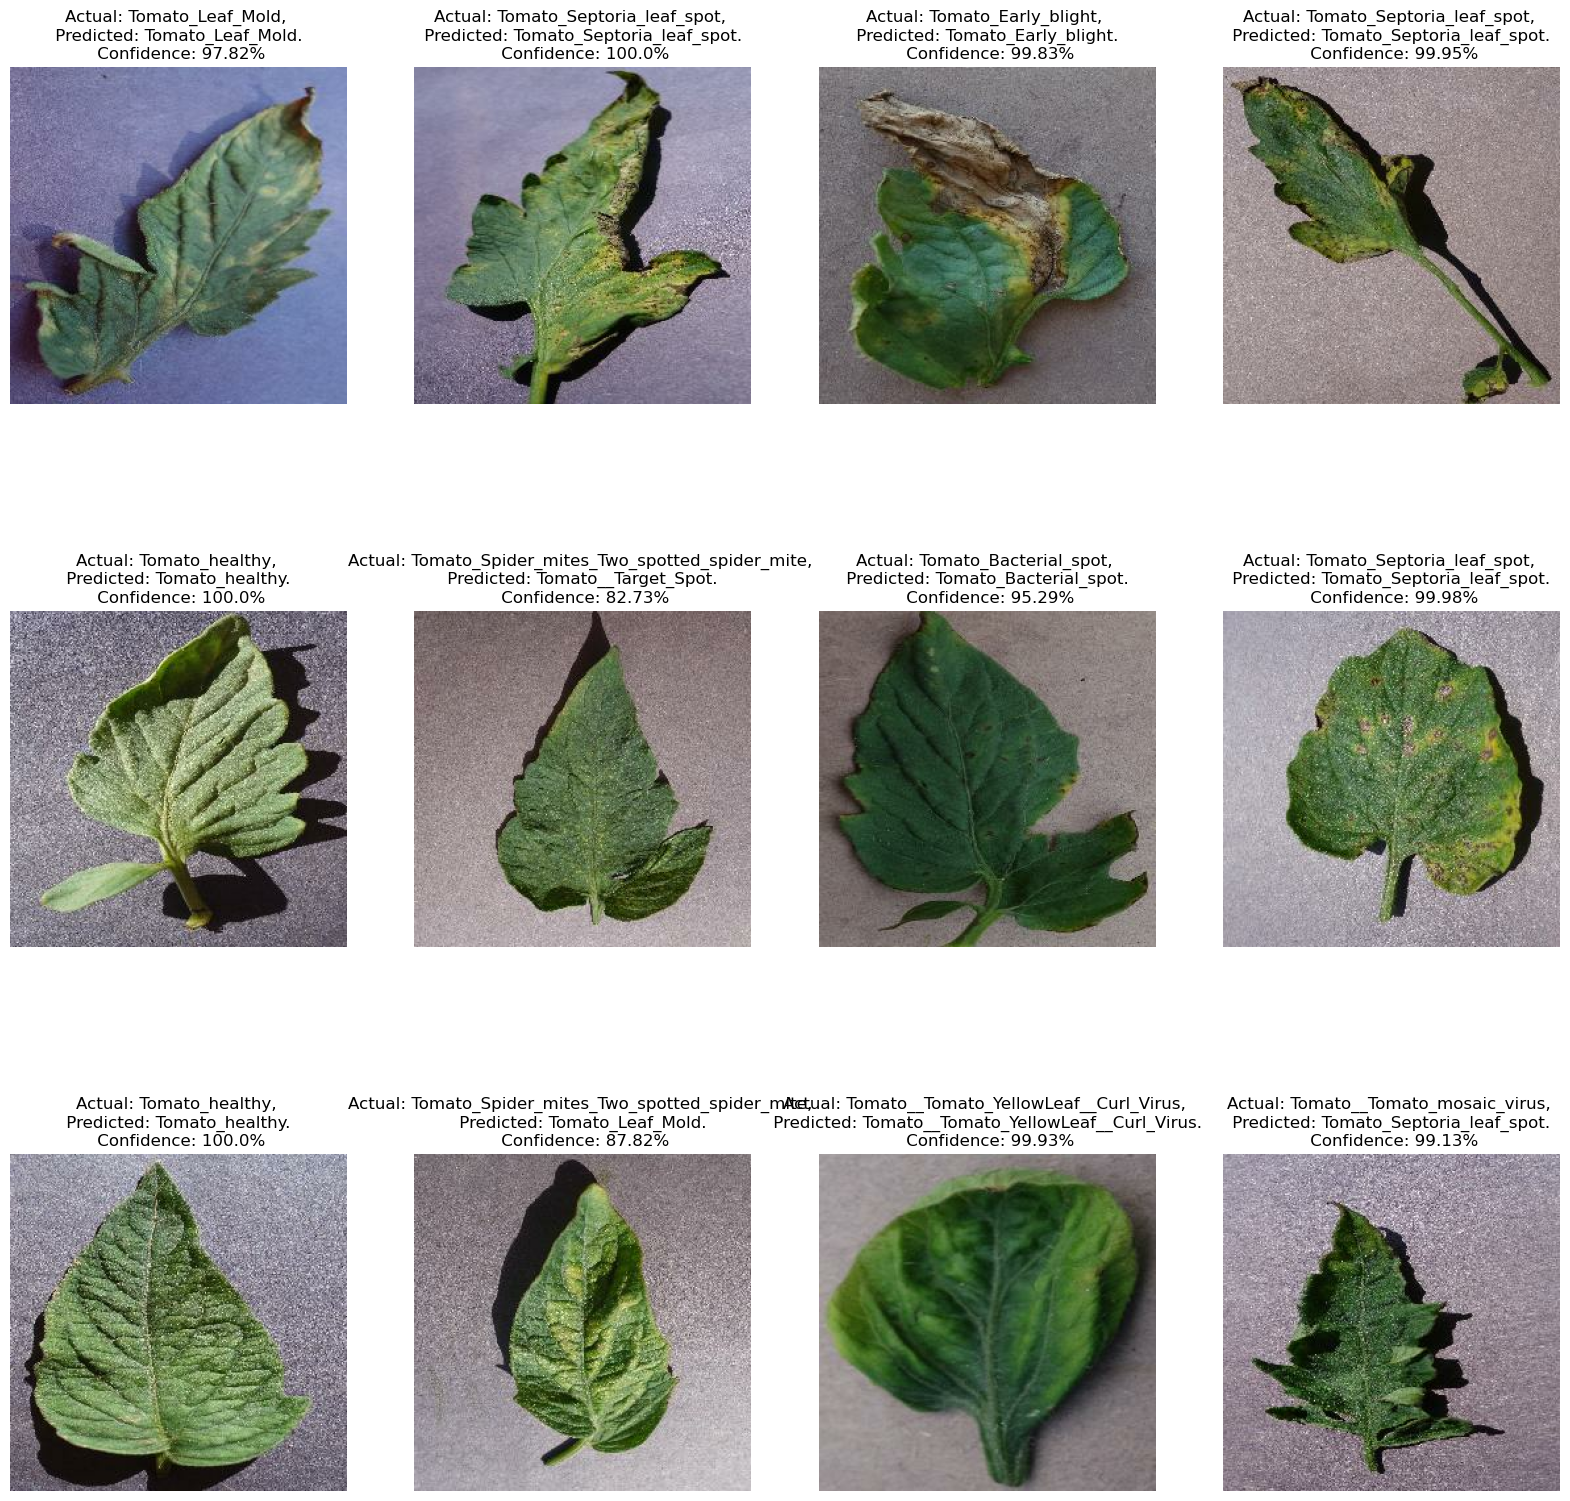

In [32]:
plt.figure(figsize=(20,20))
for images, labels in test_ds.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual: {actual_class}, \n Predicted: {predicted_class}. \n Confidence: {confidence}%")
        plt.axis('off')

In [28]:
model_version='20E'
model.save(f"./saved_models/{model_version}")

INFO:tensorflow:Assets written to: ./saved_models/20E\assets


INFO:tensorflow:Assets written to: ./saved_models/20E\assets


In [29]:
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.13.0
